In [13]:
# Import the libraries
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import numpy as np
import copy as cp


##### Solve Exercise 5 of Chapter 2.


In [14]:
# Sensor
def sense(x):
    return x

In [15]:
# Simulator
def simulate(Δt, x, u):
    # The control input is equal to the velocity of the robot
    dx = np.array(u)
    
    # Euler integration
    x += Δt * dx
    return x

In [16]:
# Control Policy
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    xd = 3
    yd = 3
    kp = (3-2)/(3-1)
    ux = kp * (xd - y[0]) # y[0] = x
    uy = kp * (yd - y[1]) # y[1] = y
    
    return np.array([ux, uy])

In [44]:
# Run simulator
tf = 19.
Δt = 0.01    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = np.array([1., 2.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(cp.copy(x))
    
x_log = np.array(x_log)

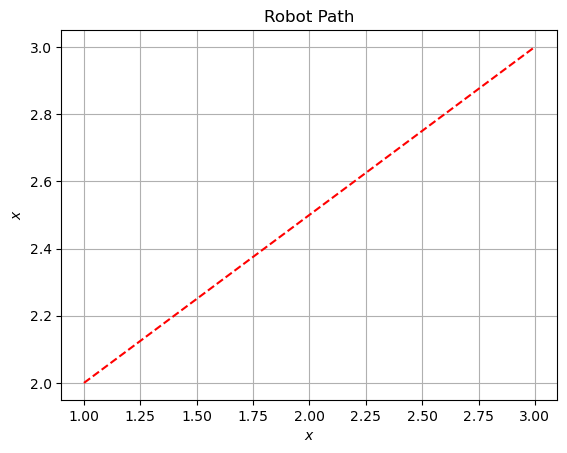

In [45]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

##### Solve Exercise 6 of Chapter 2.


In [81]:
def control2(t, y):
    # Set the perspective target points
    targets = [np.array([-2.8, 2.8]), np.array([2.8, -2.8]), np.array([2.8, 2.8]), np.array([0., 0.])]
    # Set the change time
    switch_times = [10, 20, 35, 50]  # Adjusted for clarity in timing
    
    # Determine the current target based on time
    current_target = targets[0]  # Default to the first target
    accumulated_time = 0
    for i, switch_time in enumerate(switch_times):
        accumulated_time += switch_time  # Accumulate switch times
        if t <= accumulated_time:
            current_target = targets[i]
            break
    
    # Proportional control parameters
    kp = 1.0  # Proportional gain, adjust as needed
    
    # Control signal calculation
    ux = kp * (current_target[0] - y[0])
    uy = kp * (current_target[1] - y[1])
    
    return np.array([ux, uy])


In [82]:
# Run simulator
tf = 70.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = np.array([-3., -3.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control2(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(cp.copy(x))
    
x_log = np.array(x_log)

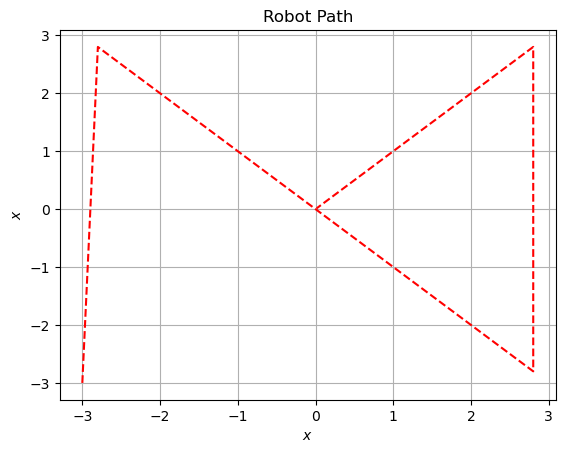

In [83]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()